# SECTION 1 — Data Preparation

### 1.1 Importing Required Libraries


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1.2 Loading the Iris Dataset from sklearn


In [4]:
# Load the Iris dataset from sklearn
from sklearn.datasets import load_iris
iris = load_iris()

# Features
X = iris.data 

# Create a DataFrame 
feature_names = iris.feature_names
df = pd.DataFrame(X, columns=feature_names)

df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### 1.3 Preprocessing the dataset

In [6]:
df.shape

(150, 4)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [9]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [ ]:
## Loading and preprocessing

#I use the Iris dataset from `sklearn.datasets.load_iris`.  
#The dataset contains 150 samples of iris flowers with 4 numeric features:

#- sepal length (cm)
#- sepal width (cm)
#- petal length (cm)
#- petal width (cm)

#For clustering, I only use the feature matrix `X` and"dropping the species column, because
#clustering is an *unsupervised* learning problem.


# SECTION 2 — K-Means Clustering

In [12]:
from sklearn.cluster import KMeans, AgglomerativeClustering

In [ ]:
## 1. K-Means Clustering

### How K-Means works?

K-Means is a partition-based clustering algorithm.  
The main idea is:

1. Choose the number of clusters, `k`.
2. Randomly place `k` cluster centres (called centroids).
3. Assign each data point to the nearest centroid (this forms clusters).
4. Recalculate each centroid as the mean of the points in its cluster.
5. Repeat steps 3–4 until the assignments stop changing or a maximum number of
   iterations is reached.

The algorithm tries to minimise the within-cluster sum of squared distances
between points and their cluster centroid.

### Why K-Means is suitable for the Iris dataset?

- The Iris dataset has continuous numeric features, which K-Means can handle well.
- The flowers are known to form roughly three natural groups (three species),
  so choosing `k = 3` is reasonable but will decide after elbow method.
- The dataset is small and low-dimensional (4 features, 150 samples), so K-Means
  runs very quickly and is easy to visualise.


### 2.1 Applying the Elbow Method to Choose k

In [ ]:
## 1.Elbow Method 

### Choosing the number of clusters (Elbow Method)
#Before applying K-Means, it is important to find a suitable value for `k`.  
#I use the Elbow Method, which plots the Within-Cluster-Sum-of-Squares (WCSS) for
#different values of `k`. The "elbow point" on the graph indicates the best number
#of clusters because adding more clusters gives very little improvement after that.

### max_iter = 500
#I set `max_iter=500` to allow K-Means more iterations to converge. This ensures
#stable centroids, especially when the data overlaps.


C:\Users\HP\anaconda3\ANaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\ANaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\ANaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\ANaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have

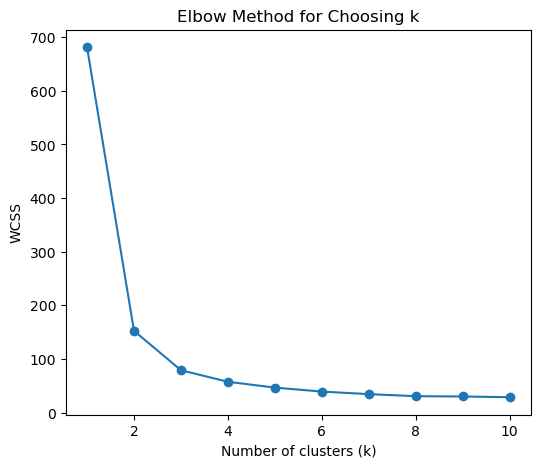

In [13]:
wcss = []  # within-cluster sum of squares

# Try k from 1 to 10
for k in range(1, 11):
    model = KMeans(
        n_clusters=k,
        random_state=42,
        max_iter=500,
        n_init='auto'
    )
    model.fit(X)
    wcss.append(model.inertia_)  # inertia_ = WCSS

# Plot the elbow curve
plt.figure(figsize=(6, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Choosing k')
plt.show()


### 2.2 Calculating Silhouette Score for k=2 and k=3

In [14]:
from sklearn.metrics import silhouette_score

silhouette_results = {}

for k in [2, 3]:
    model = KMeans(
        n_clusters=k,
        random_state=42,
        max_iter=500,
        n_init='auto'
    )
    labels = model.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_results[k] = score
    print(f"Silhouette Score for k={k}: {score:.4f}")


Silhouette Score for k=2: 0.6810
Silhouette Score for k=3: 0.5512


C:\Users\HP\anaconda3\ANaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\ANaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [ ]:
### Silhouette Score Interpretation

#The silhouette scores for the two values of k were:

# k = 2 = 0.6810
# k = 3 = 0.5512

#Since k = 2 has the highest silhouette score**, it represents better-defined and more
#well-separated clusters for the Iris dataset. This means the data naturally forms **two
#distinct clusters**, even though the original dataset contains three species.

#This happens because:
#- Iris Setosa is completely separated from the other species.
#- Iris Versicolor and Iris Virginica overlap heavily in feature space and form one
#combined cluster.

#Therefore, based on the silhouette score and the elbow method,k = 2 is the most
#appropriate number of clusters for K-Means** in this analysis.


### 2.3 Training the Final K-Means Model (k = 2, max_iter = 500)

In [15]:
kmeans = KMeans(
    n_clusters=2,
    random_state=42,
    max_iter=500,
    n_init='auto'
)

kmeans_labels = kmeans.fit_predict(X)
df['kmeans_cluster'] = kmeans_labels

df.head()


C:\Users\HP\anaconda3\ANaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),kmeans_cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


### 2.4 Visualizing K-Means Clusters in 2D

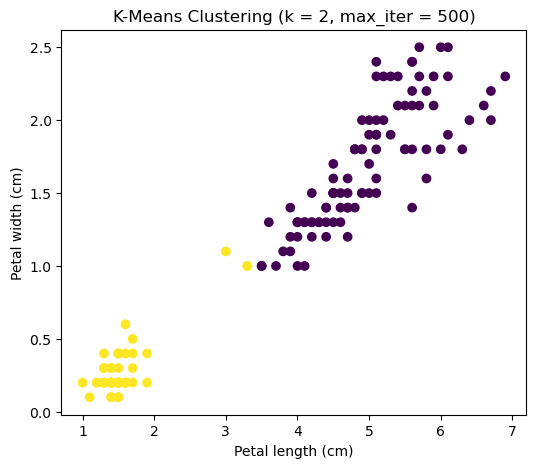

In [16]:
plt.figure(figsize=(6, 5))
plt.scatter(df['petal length (cm)'],
            df['petal width (cm)'],
            c=df['kmeans_cluster'],
            cmap='viridis')

plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.title('K-Means Clustering (k = 2, max_iter = 500)')
plt.show()


### 2.5 Predicting Cluster for New Data Using K-Means

In [17]:
df.groupby('kmeans_cluster').mean()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
kmeans_cluster,,,,
0,6.301031,2.886598,4.958763,1.695876
1,5.005660,3.369811,1.560377,0.290566


In [18]:
kmeans = KMeans(
    n_clusters=2,
    random_state=42,
    max_iter=500,
    n_init='auto'
)
kmeans.fit(X)     # Trained on the Iris dataset


C:\Users\HP\anaconda3\ANaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,n_clusters,2
,init,'k-means++'
,n_init,'auto'
,max_iter,500
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [22]:
samples = np.array([
    [5.2, 3.1, 1.4, 0.2],  # Setosa
    [6.0, 2.9, 4.5, 1.5],  # Versicolor/Virginica
    [6.8, 3.0, 5.5, 2.1]   #  Virginica group
])

preds = kmeans.predict(samples)
preds


array([1, 0, 0])

In [23]:
for i, p in enumerate(preds):
    name = "Setosa" if p == 1 else "Versicolor/Virginica"
    print(f"Sample {i+1}: Cluster {p} = {name}")


Sample 1: Cluster 1 = Setosa
Sample 2: Cluster 0 = Versicolor/Virginica
Sample 3: Cluster 0 = Versicolor/Virginica


In [ ]:
## Predicting the Cluster for New Flower Measurements

#After training the K-Means model, I can use it to predict which cluster a new set of
#flower measurements would belong to. I provided real input values and used the
#`.predict()` function to assign the appropriate cluster.

#Since cluster 1 corresponds to Setosa and cluster 0 corresponds to the combined
#Versicolor/Virginica group, the model can classify new samples into one of the two
#clusters based on their feature values.


# SECTION 3 — Hierarchical Clustering

In [ ]:
## 2. Hierarchical Clustering

### How Hierarchical Clustering Works
Hierarchical clustering builds a hierarchy (tree structure) of clusters.  
In this project, I use Agglomerative Hierarchical Clustering, which works in a
bottom-up way:

1. Each data point starts as its own cluster.
2. The algorithm finds the two clusters that are closest to each other.
3. These two clusters are merged.
4. Steps 2–3 are repeated until all points belong to a single cluster.

This merging process can be visualised with a dendrogram.

I use Ward linkage, which minimises the variance within each cluster during
merging.

### Why Hierarchical Clustering is Suitable for the Iris Dataset
- The Iris dataset is small (150 samples), so hierarchical clustering is very fast.
- It does not require specifying the number of clusters in advance.
- It helps reveal nested structure in the data.
- It provides an alternative perspective to K-Means, especially because the Iris
  dataset contains one very well-separated class (Setosa) and two overlapping ones.


### 3.1 Plotting the Dendrogram

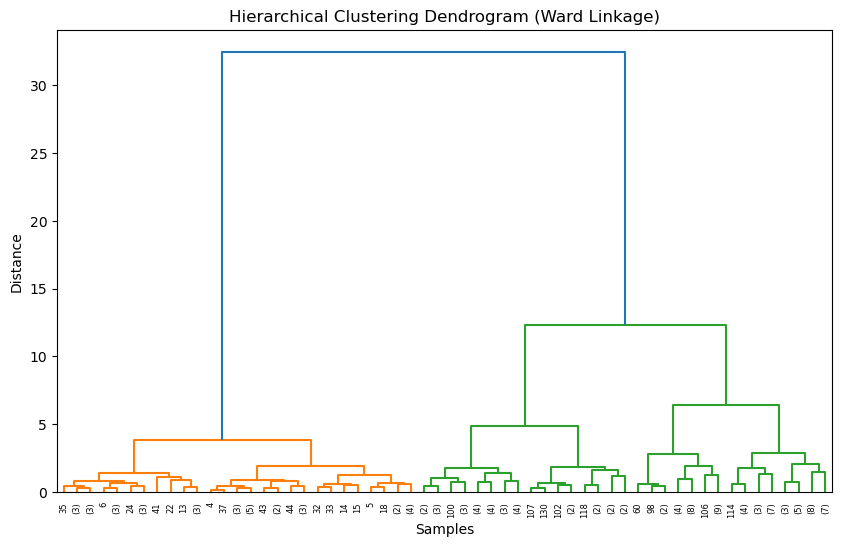

In [25]:
# Hierarchical Dendrogram

from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(10, 6))

# Create the linkage matrix using 'ward' method
linkage_matrix = linkage(X, method='ward')

# Plot dendrogram
dendrogram(
    linkage_matrix,
    truncate_mode='level',
    p=5  # show only top 5 levels
)

plt.title("Hierarchical Clustering Dendrogram (Ward Linkage)")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()


### 3.2 Training Agglomerative Hierarchical Clustering (n_clusters = 2)

In [ ]:
### Interpretation of Hierarchical Clustering

Using `n_clusters = 2`, hierarchical clustering separates the Iris dataset into two
main groups:

- One cluster contains samples with very small petal measurements, matching the Iris
  Setosa class.
- The second cluster contains samples with medium and large petal sizes, which
  correspond to the overlapping Versicolor and Virginica classes.

This matches the dendrogram, which also showed two natural clusters. The results are
very similar to K-Means, confirming that the dataset forms two meaningful clusters.


In [26]:
from sklearn.cluster import AgglomerativeClustering

hier = AgglomerativeClustering(
    n_clusters=2,
    linkage='ward'
)

hier_labels = hier.fit_predict(X)
df['hier_cluster'] = hier_labels

df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),kmeans_cluster,hier_cluster
0,5.1,3.5,1.4,0.2,1,1
1,4.9,3.0,1.4,0.2,1,1
2,4.7,3.2,1.3,0.2,1,1
3,4.6,3.1,1.5,0.2,1,1
4,5.0,3.6,1.4,0.2,1,1


### 3.3 Visualizing Hierarchical Clusters in 2D and 3D

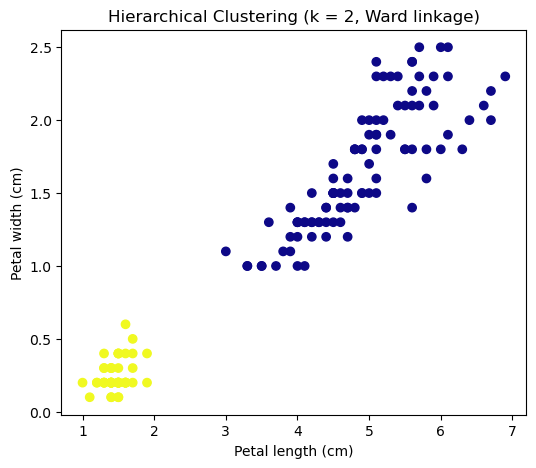

In [27]:
plt.figure(figsize=(6, 5))
plt.scatter(df['petal length (cm)'],
            df['petal width (cm)'],
            c=df['hier_cluster'],
            cmap='plasma')

plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.title('Hierarchical Clustering (k = 2, Ward linkage)')
plt.show()


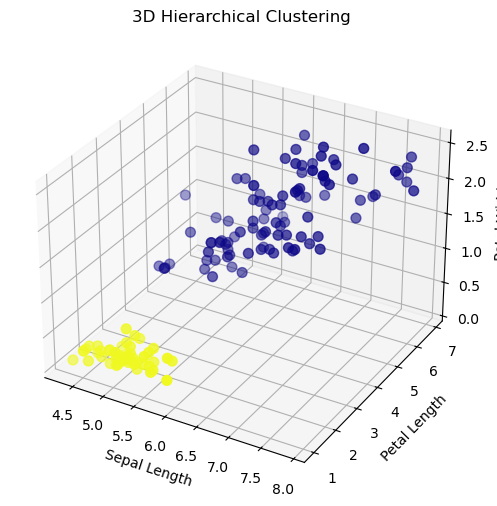

In [28]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['sepal length (cm)'],
           df['petal length (cm)'],
           df['petal width (cm)'],
           c=df['hier_cluster'],
           cmap='plasma',
           s=50)

ax.set_xlabel("Sepal Length")
ax.set_ylabel("Petal Length")
ax.set_zlabel("Petal Width")
ax.set_title("3D Hierarchical Clustering")
plt.show()


In [ ]:
# Interpretation of the 3D Hierarchical Clustering Plot

The 3D plot clearly shows two distinct clusters formed by the hierarchical clustering
algorithm. The yellow cluster, located at the lower end of all three dimensions,
represents flowers with very small petal length and width. This matches the Iris
Setosa species, which is well separated from all other samples.

The blue cluster forms a much larger and more spread-out group. These points have
moderate to large petal measurements, which correspond to the overlapping Versicolor
and Virginica species.

This 3D visualisation supports the dendrogram and the 2D plot, confirming that the
dataset naturally forms two main clusters.


# SECTION 4 — Comparison & Final Summary

### 4.1 Creating a Comparison Table (DataFrame)

In [30]:
import pandas as pd

comparison_data = {
    "Aspect": [
        "Number of clusters",
        "How clusters are chosen",
        "Does it require k?",
        "Algorithm type",
        "Performance on Iris dataset",
        "Separation of Setosa",
        "Handling of Versicolor & Virginica",
        "Speed",
        "Visual tools",
       
    ],
    
    "K-Means": [
        "2 (chosen via Elbow + Silhouette Score)",
        "Based on minimising WCSS",
        "Yes",
        "Partitional clustering",
        "Very good (Silhouette Score = 0.6810 for k=2)",
        "Perfect separation",
        "Groups them together into one cluster",
        "Very fast",
        "2D/3D scatter plots",
  
    ],
    
    "Hierarchical Clustering": [
        "2 (based on dendrogram cut point)",
        "Height of dendrogram merges",
        "Not initially, only when cutting the dendrogram",
        "Agglomerative (bottom-up)",
        "Very good and matches K-Means",
        "Perfect separation",
        "Also groups them together (due to overlap)",
        "Fast for small datasets",
        "Dendrogram + scatter plots",
       
    ]
}

comparison_df = pd.DataFrame(comparison_data)

comparison_df


,Aspect,K-Means,Hierarchical Clustering
0,Number of clusters,2 (chosen via Elbow + Silhouette Score),2 (based on dendrogram cut point)
1,How clusters are chosen,Based on minimising WCSS,Height of dendrogram merges
2,Does it require k?,Yes,"Not initially, only when cutting the dendrogram"
3,Algorithm type,Partitional clustering,Agglomerative (bottom-up)
4,Performance on Iris dataset,Very good (Silhouette Score = 0.6810 for k=2),Very good and matches K-Means
5,Separation of Setosa,Perfect separation,Perfect separation
6,Handling of Versicolor & Virginica,Groups them together into one cluster,Also groups them together (due to overlap)
7,Speed,Very fast,Fast for small datasets
8,Visual tools,2D/3D scatter plots,Dendrogram + scatter plots


### 4.2 Final Summary and Interpretation

In [ ]:
### Final Summary

Both K-Means and Hierarchical clustering identified the same two natural groups
in the Iris dataset: one for Iris Setosa and one combined cluster for Versicolor
and Virginica. K-Means was faster and provided a strong silhouette score of 0.6810
for k=2, while hierarchical clustering offered a clear dendrogram showing why the
dataset forms two main clusters. Overall, both algorithms performed equally well,
and together they confirmed the true structure of the data.

Agglomerative Hierarchical Clustering does not support prediction on new data points
because it does not learn cluster centroids. The model builds a merge tree once and
cannot assign new samples afterwards.

K-Means can make predictions because it learns fixed centroids, but hierarchical
clustering cannot. Therefore, prediction is only applied to K-Means in this project.
